<a href="https://colab.research.google.com/github/Evandro72/TextMiningDashBoard/blob/main/NGramByLanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=09daa58002acc36ae69ce1ff370120dda267dbdea4472b9c4317cf5092bdbb8f
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [2]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 50.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=01d1b35ea9b639760094e16861bb1e9c6282d72a0d915ce6e7af91ba1365c37c
  Stored in directory: /root/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [3]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.2 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=d5d5922282712cb24f9e2523c0be481ef2984b80f1871bd0c4ec4a27f7d6893d
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


In [4]:
from PIL import Image
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from langdetect import detect
import random
import pycountry
import swifter

In [5]:
# Creating Language Dict
Languages = {}

for lang in pycountry.languages:
    try:
        Languages[lang.alpha_2] = lang.name
    except:
        pass

In [6]:
# Tweets were based on these Languages 
Unique_Lang_Code = ['it', 'da', 'zh-cn', 'en', 'lt', 'fr', 'sl', 'hu', 'sq', 'sv', 'uk', 'sk', 'ca', 'lv', 'af', 'th', 'no', 'fi', 'vi', 'de', 'cy', 'ja', 'nl', 'es', 'cs', 'ro', 'tl', 'pl', 'id', 'fa', 'ru', 'et', 'sw', 'tr', 'pt', 'el', 'so', 'hr']

In [7]:
# Reading CSV File
df = pd.read_csv('TweetsAccordiCleaned.csv')

In [8]:
# Filtering Tweets on Language

for index, tweet in enumerate(df['Cleaned_Tweet']):
    try:
        languade_2code = detect(tweet)
        df.loc[index, 'Language'] = Languages[languade_2code]        
    except:
        df[index, 'Language'] = 'Unknown'        

In [9]:
# Break into N Grams
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n=1):
    text = str(text)
    n_grams = ngrams(text.split(), n)
    returnVal = []
    
    try:
        for grams in n_grams:
            returnVal.append('_'.join(grams))
    except(RuntimeError):
        pass
        
    return ' '.join(returnVal).strip()

In [16]:
# Replacing Text
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('UmbriaJazzOFC','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('umbriajazz','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Umbria Jazz','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('jazz','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Umbria','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('musica','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('perugia','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Santa Giuliana','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Perugia','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Umbria','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Lady Gaga','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('UMBRIA','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Morlacchi','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('IV Novembre','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Jazz','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('live','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('music','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('italy','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('luglio','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('amp','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('festival','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('orvieto','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('umbria','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Orvieto','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Italy','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('JAZZ','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('july','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('great','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('night','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('July','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('uj','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('UJ','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('concerto','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('UJ','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('oggi','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('grande','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('La','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('via','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('palco','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('grazie','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('AccordiDisaccordi','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Accordi','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Disaccordi','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('accordidisaccordi','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('accordi','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('disaccordi','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('Accor','')
df['Cleaned_Tweet'] = df['Cleaned_Tweet'].str.replace('DISACCORDI','')


In [17]:
# Bigram
df['bigram_text'] = df['Cleaned_Tweet'].swifter.apply(get_ngrams, n=1)

Pandas Apply:   0%|          | 0/321 [00:00<?, ?it/s]

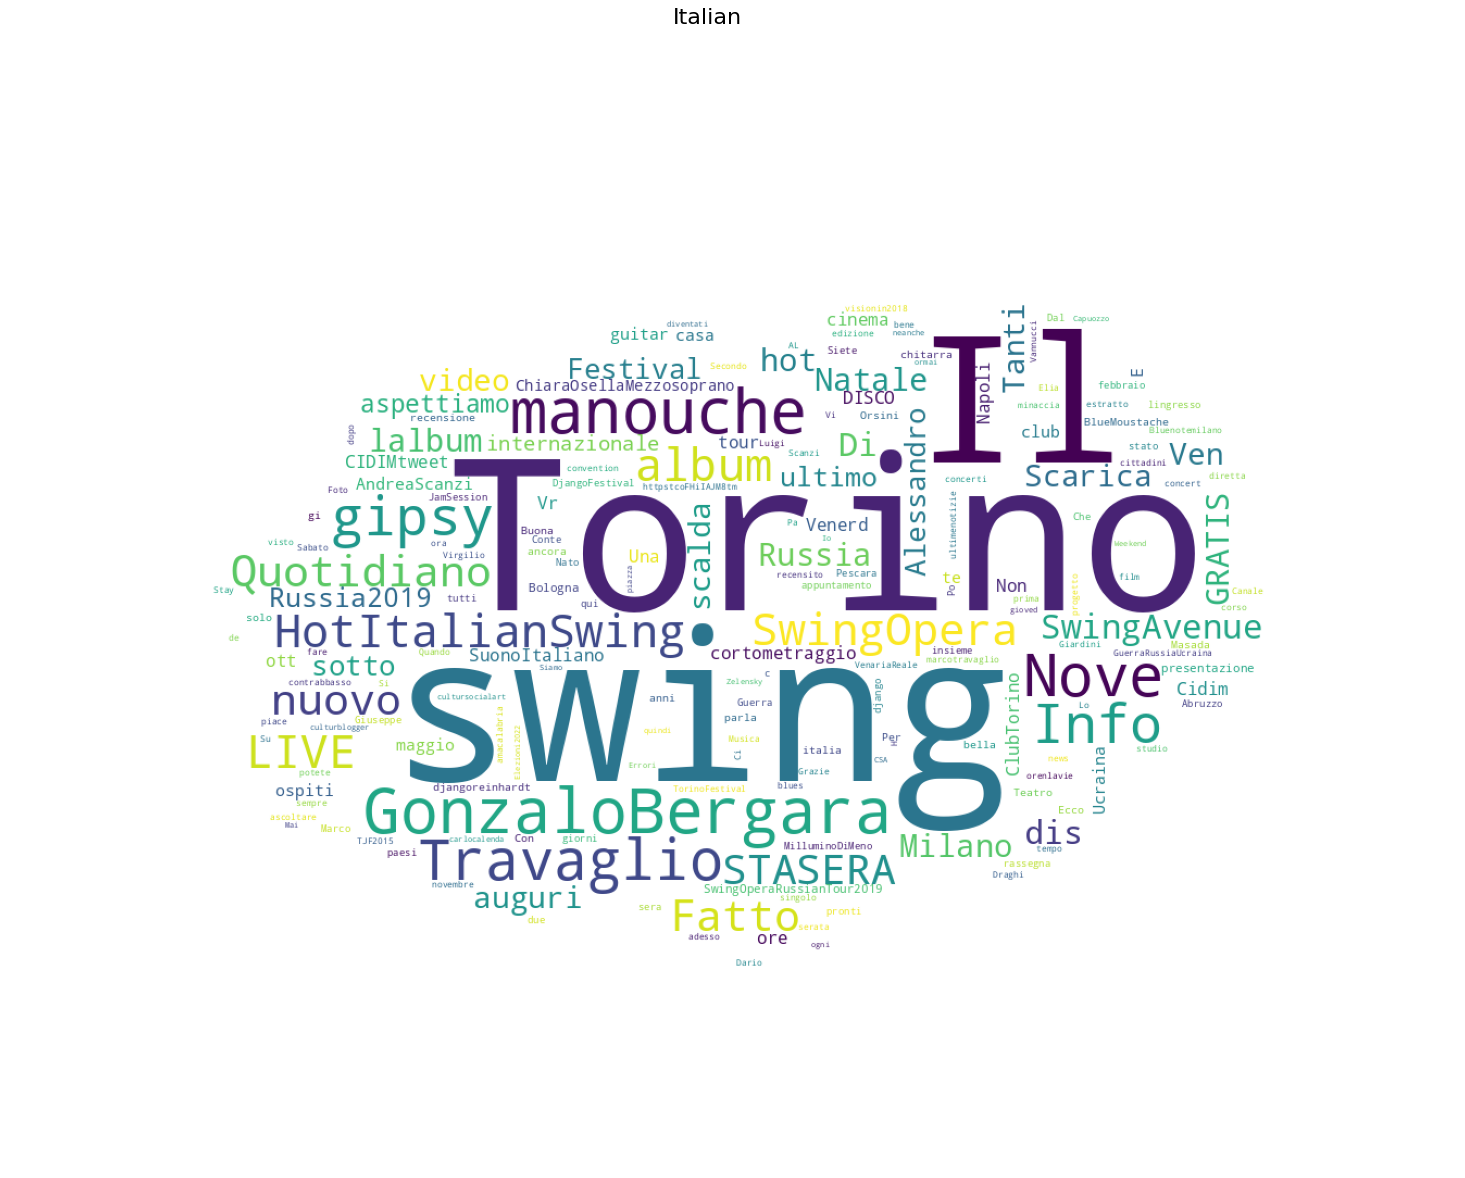

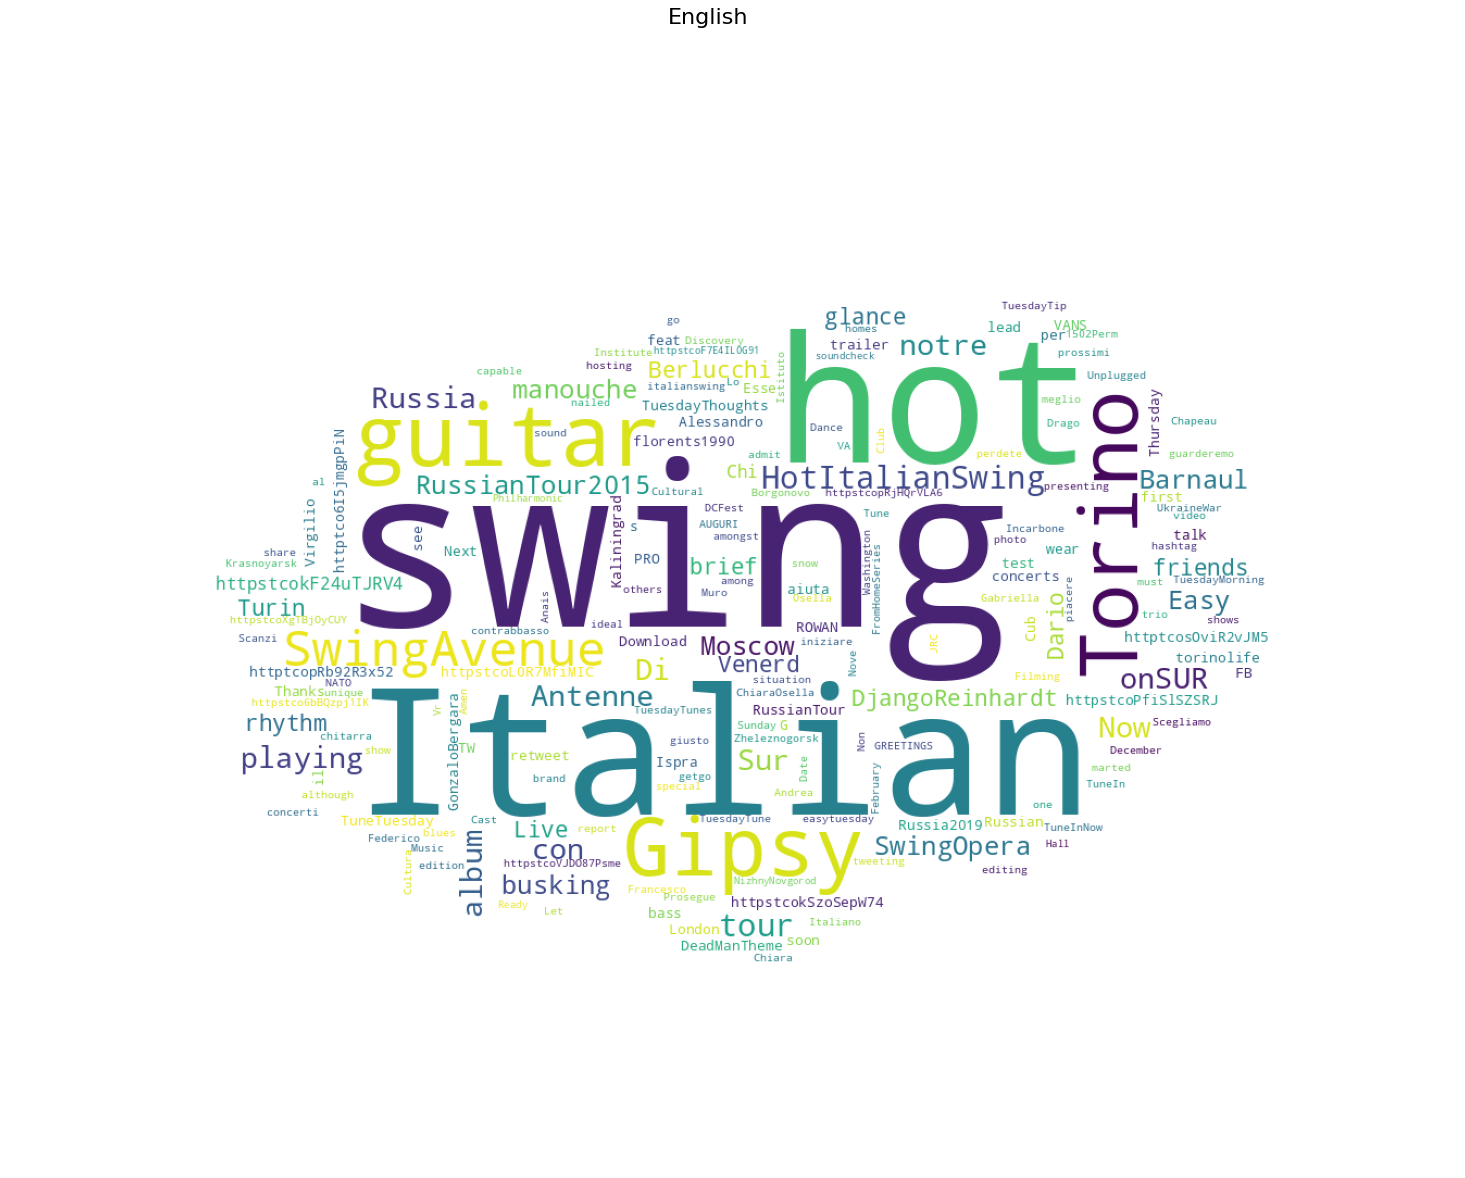

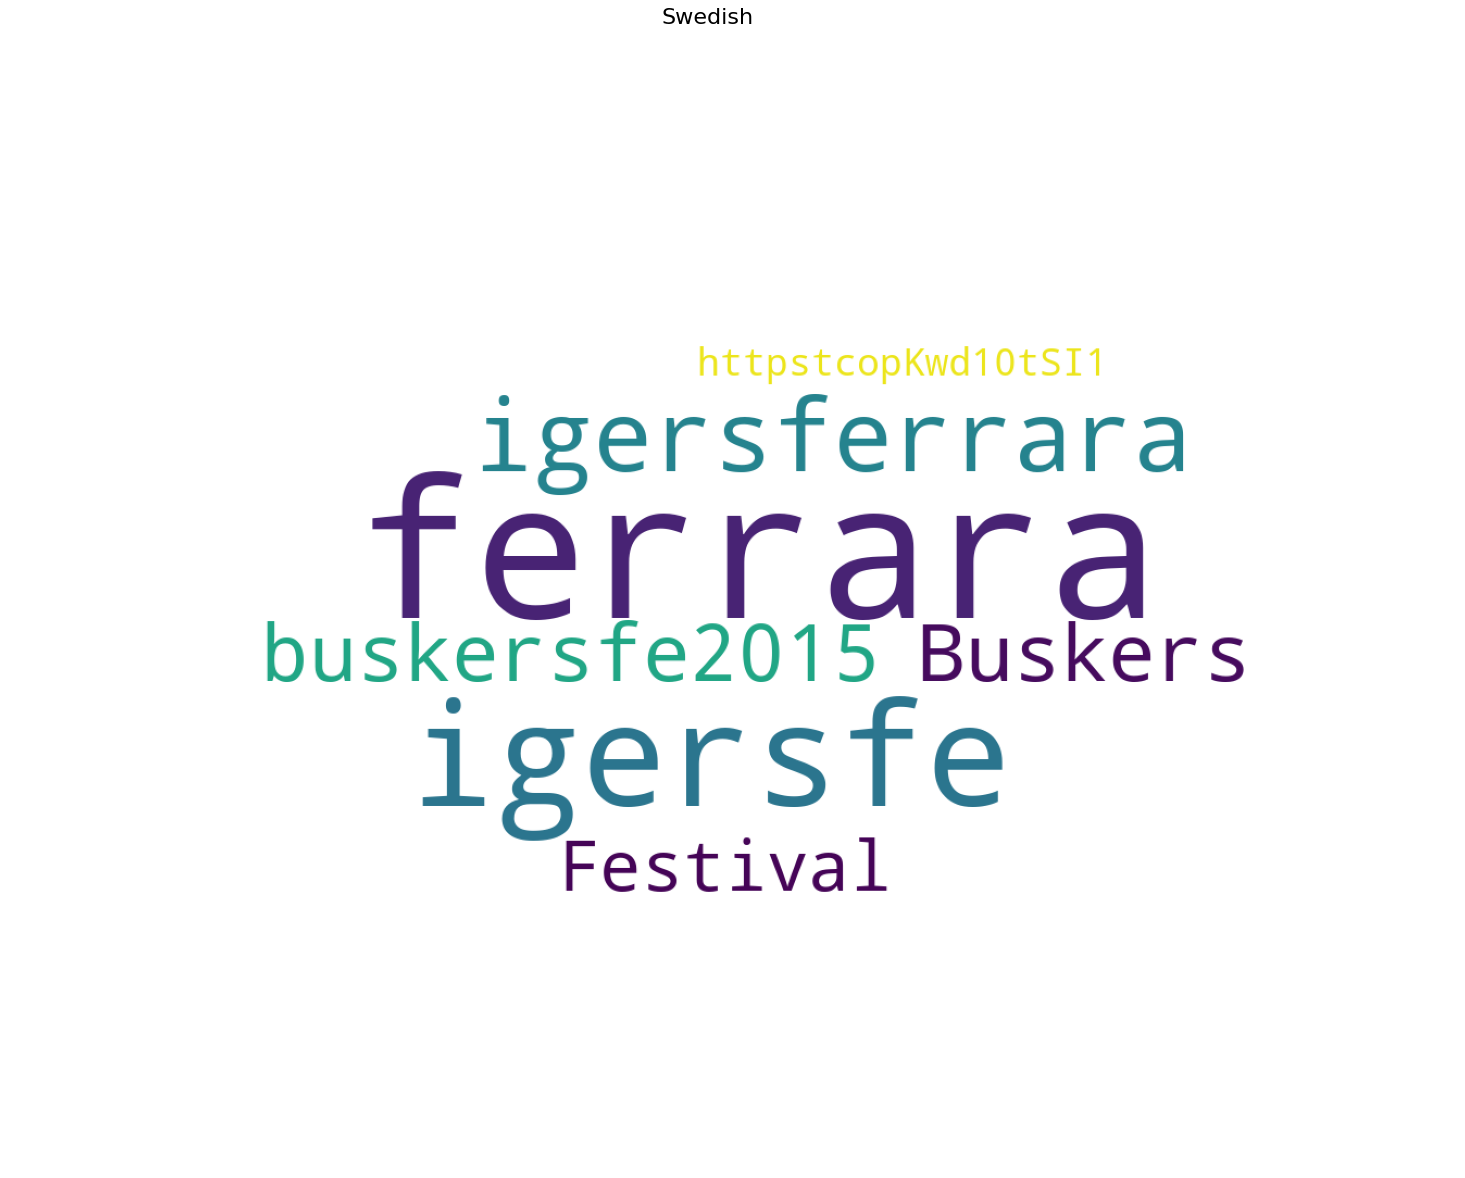

In [18]:
# for the wordcloud
mask = np.array(Image.open('cloud.png'))

for lang in df['Language'].unique().tolist():
    df2 = df[df['Language'] == lang]


    wordcloud = WordCloud(
                    width = 2000, 
                    height = 1334, 
                    random_state=1, 
                    background_color='white',                 
                    max_words = 200,
                    mask=mask,
                    collocations=False, 
                    normalize_plurals=False
                ).generate(' '.join(df2['bigram_text'].tolist()))

    fig = plt.figure(figsize=(25, 17), dpi=80)
    fig.suptitle(lang, fontsize=20)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close()     